## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from numpy import linalg as LA
from sklearn.metrics import r2_score

%matplotlib inline


In [2]:
def plotting (x_axis,y_axis,x_label,y_label,title):
    font1 = {'family':'serif','color':'blue','size':20}
    font2 = {'family':'serif','color':'darkred','size':15}
    plt.title(title, fontdict = font1)
    plt.xlabel(x_label, font1)
    plt.ylabel(y_label, font2)
    plt.plot(x_axis,y_axis)
    plt.scatter(x_axis,y_axis,c="r")

    plt.show()

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [3]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [4]:
a=-1
b=2
y=a*X+b
y

array([  2.        ,   1.59183673,   1.18367347,   0.7755102 ,
         0.36734694,  -0.04081633,  -0.44897959,  -0.85714286,
        -1.26530612,  -1.67346939,  -2.08163265,  -2.48979592,
        -2.89795918,  -3.30612245,  -3.71428571,  -4.12244898,
        -4.53061224,  -4.93877551,  -5.34693878,  -5.75510204,
        -6.16326531,  -6.57142857,  -6.97959184,  -7.3877551 ,
        -7.79591837,  -8.20408163,  -8.6122449 ,  -9.02040816,
        -9.42857143,  -9.83673469, -10.24489796, -10.65306122,
       -11.06122449, -11.46938776, -11.87755102, -12.28571429,
       -12.69387755, -13.10204082, -13.51020408, -13.91836735,
       -14.32653061, -14.73469388, -15.14285714, -15.55102041,
       -15.95918367, -16.36734694, -16.7755102 , -17.18367347,
       -17.59183673, -18.        ])

#### Plot X vs. y

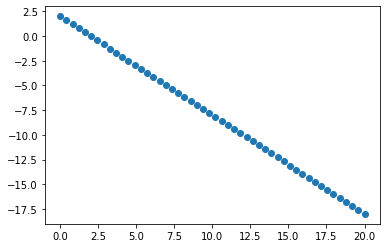

In [ ]:
plt.scatter(X,y)
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

##### The following results uses alpha = 0.05, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
def GD_WITH_ADAgrad(Input, Target, Learning_rate, iteration):
    # iterate 500 times to get minimum loss fun 
    theta_0 =0
    theta_1 =0
    v_t0=0 # for momentum ||theta_0
    v_t1=0 # for momentum ||theta_1
    lr=Learning_rate
    X = Input
    y = Target
    m = len(X)
    epsilon=1e-08
    cost_lst = []
    theta0_all=[]
    theta1_all=[]
    h_x_all=[]
    itert=0
    #theta_0_new = theta_0
    #theta_1_new = theta_1
    for i in range (iteration):
        # general function of the model of LR
        h_x = theta_0 + X*theta_1
        # error = predicted -actual
        error = h_x - y
        # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
        MSA = error @ error / (2 * m)
        cost_lst.append(MSA)
        # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
        d_theta_0 = (sum(error)/m) # dj/d theta_0 = segma(error) /m 
        d_theta_1 = (error@X) /m   #dj/d theta_1 = segma(error)*X /m
        # update the weights
        # use momentum || for theta_0
        v_t0 = v_t0 + (d_theta_0)**2
        theta_0 = theta_0 - (lr*d_theta_0)/(v_t0**0.5 +epsilon)
        # use momentum || for theta_1
        v_t1 = v_t1 + (d_theta_1)**2
        theta_1 = theta_1 - (lr*d_theta_1)/(v_t1**0.5 +epsilon)
        # append in theta0 and theta1 lists 
        theta0_all.append(theta_0)
        theta1_all.append(theta_1)
        h_x_all.append(h_x)
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)
        if i<10 or i>(iteration-10):
            print("\n###########iteration==",i,"#######################")
            #print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (cost_lst[i] -cost_lst[i-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            #print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break


    return(theta0_all, theta1_all, h_x_all,cost_lst, theta_0, theta_1)
    
    

In [ ]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAgrad(X, y, 0.05,500)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.45       107.45918367]
gradient_vector_norm 114.90918367478768

###########iteration== 2 #######################
gradient_vector [  7.0740666  102.51381089]
gradient_vector_norm 109.58787748827493

###########iteration== 3 #######################
gradient_vector [ 6.77374581 98.56291678]
gradient_vector_norm 105.33666258610563

###########iteration== 4 #######################
gradient_vector [ 6.51816396 95.2004429 ]
gradient_vector_norm 101.7186068584185

###########iteration== 5 #######################
gradient_vector [ 6.29301088 92.23817484]
gradient_vector_norm 98.5311857254782

###########iteration== 6 #######################
gradient_vector [ 6.09028795 89.57090961]
gradient_vector_norm 95.66119755789023

###########iteration== 7 #######################
gradient_vector [ 5.9049

In [ ]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9568765565616391

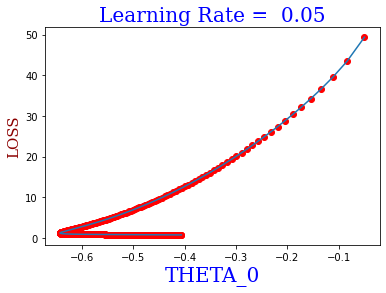

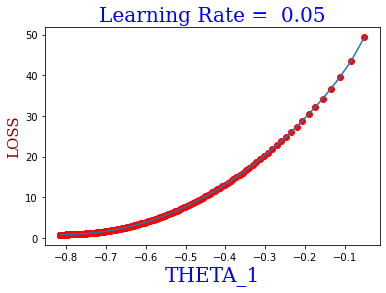

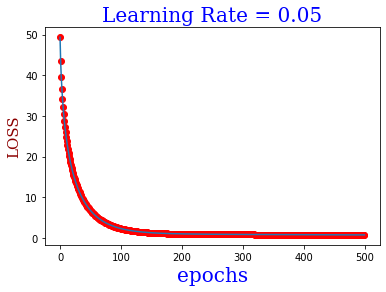

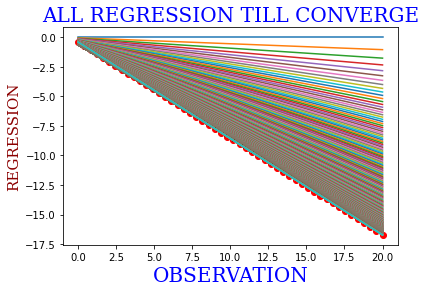

In [ ]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.05")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.05")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.05")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

##### The following results uses alpha = 0.005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAgrad(X, y, 0.005,5000)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.945      113.97040816]
gradient_vector_norm 121.91540816339713

###########iteration== 2 #######################
gradient_vector [  7.90623338 113.46046928]
gradient_vector_norm 121.36670266506675

###########iteration== 3 #######################
gradient_vector [  7.87464257 113.04491992]
gradient_vector_norm 120.91956249092038

###########iteration== 4 #######################
gradient_vector [  7.84732511 112.68558166]
gradient_vector_norm 120.53290677339892

###########iteration== 5 #######################
gradient_vector [  7.8229222 112.364581 ]
gradient_vector_norm 120.18750320278444

###########iteration== 6 #######################
gradient_vector [  7.80066986 112.07186875]
gradient_vector_norm 119.87253861078332

###########iteration== 7 #######################
gradient_vecto

In [ ]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.7096780137749921

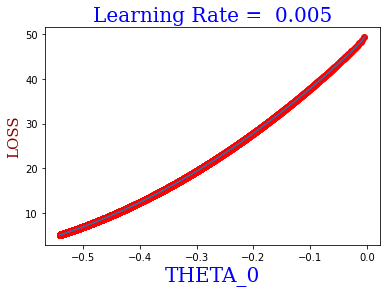

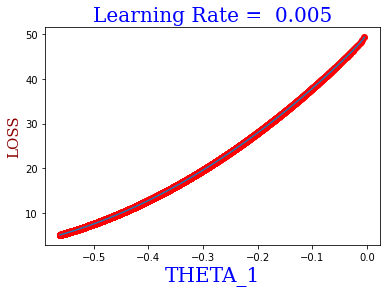

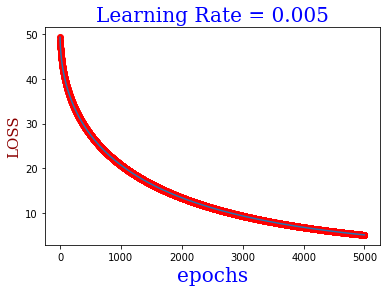

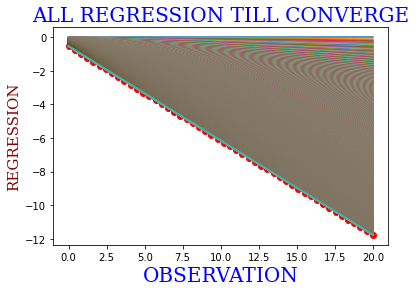

In [ ]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.005")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.005")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

##### The following results uses alpha = 0.0005, epsilon =  1e-08, and max. iterations = 5000.

In [ ]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAgrad(X, y, 0.0005,5000)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.9945     114.62153061]
gradient_vector_norm 122.6160306122581

###########iteration== 2 #######################
gradient_vector [  7.99061215 114.57038984]
gradient_vector_norm 122.56100199364498

###########iteration== 3 #######################
gradient_vector [  7.98743835 114.52864167]
gradient_vector_norm 122.51608001558941

###########iteration== 4 #######################
gradient_vector [  7.98469016 114.49249201]
gradient_vector_norm 122.47718217568206

###########iteration== 5 #######################
gradient_vector [  7.98223241 114.46016274]
gradient_vector_norm 122.44239515428853

###########iteration== 6 #######################
gradient_vector [  7.97998904 114.43065344]
gradient_vector_norm 122.41064248476468

###########iteration== 7 #######################
gradient_vect

In [ ]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

-1.378703504649708

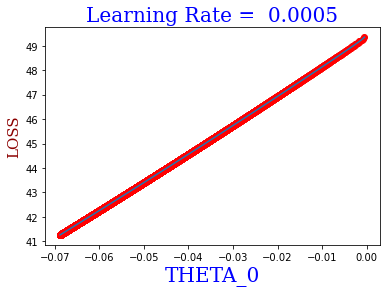

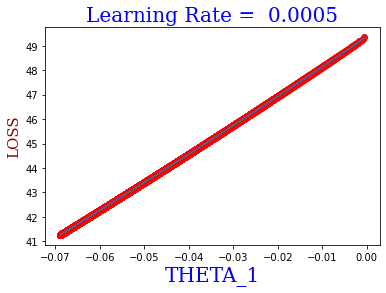

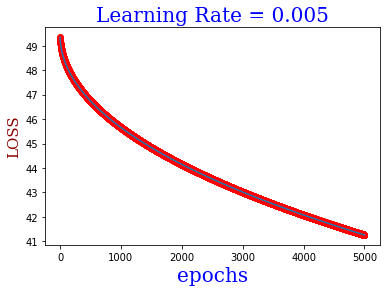

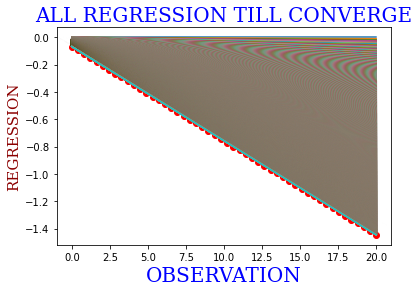

In [ ]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.0005")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.0005")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

In [ ]:
def GD_WITH_RMS(Input, Target, Learning_rate, beta ,iteration):
    # iterate 500 times to get minimum loss fun 
    theta_0 =0
    theta_1 =0
    v_t0=0 # for momentum ||theta_0
    v_t1=0 # for momentum ||theta_1
    lr=Learning_rate
    X = Input
    y = Target
    m = len(X)
    epsilon=1e-08
    cost_lst = []
    theta0_all=[]
    theta1_all=[]
    h_x_all=[]
    itert=0
    #theta_0_new = theta_0
    #theta_1_new = theta_1
    for i in range (iteration):
        # general function of the model of LR
        h_x = theta_0 + X*theta_1
        # error = predicted -actual
        error = h_x - y
        # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
        MSA = error @ error / (2 * m)
        cost_lst.append(MSA)
        # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
        d_theta_0 = (sum(error)/m) # dj/d theta_0 = segma(error) /m 
        d_theta_1 = (error@X) /m   #dj/d theta_1 = segma(error)*X /m
        # update the weights
        # use momentum || for theta_0
        v_t0 = beta*v_t0 + (1-beta)*(d_theta_0)**2
        theta_0 = theta_0 - (lr*d_theta_0)/(v_t0**0.5 +epsilon)
        # use momentum || for theta_1
        v_t1 = beta*v_t1 + (1-beta)*(d_theta_1)**2
        theta_1 = theta_1 - (lr*d_theta_1)/(v_t1**0.5 +epsilon)
        # append in theta0 and theta1 lists 
        theta0_all.append(theta_0)
        theta1_all.append(theta_1)
        h_x_all.append(h_x)
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)
        if i<10 or i>(iteration-10):
            print("\n###########iteration==",i,"#######################")
            #print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (cost_lst[i] -cost_lst[i-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            #print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break


    return(theta0_all, theta1_all, h_x_all,cost_lst, theta_0, theta_1)
    
    

##### The following results uses alpha = 0.05, beta = 0.9, epsilon =  1e-08, and max. iterations = 500.

In [ ]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_RMS(X, y, 0.05,0.9,500)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [ 6.26074729 91.81576674]
gradient_vector_norm 98.07651402397408

###########iteration== 2 #######################
gradient_vector [ 5.14044362 77.07503676]
gradient_vector_norm 82.21548038160375

###########iteration== 3 #######################
gradient_vector [ 4.28050453 65.75681812]
gradient_vector_norm 70.03732264837798

###########iteration== 4 #######################
gradient_vector [ 3.57514932 56.470013  ]
gradient_vector_norm 60.045162312109035

###########iteration== 5 #######################
gradient_vector [ 2.97706285 48.59226634]
gradient_vector_norm 51.569329189064

###########iteration== 6 #######################
gradient_vector [ 2.46053155 41.78525733]
gradient_vector_norm 44.24578887956934

###########iteration== 7 #######################
gradient_vector [ 2.00985155 35

In [ ]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9673722123460657

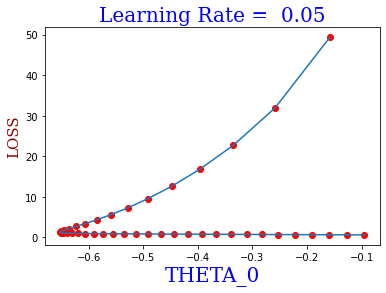

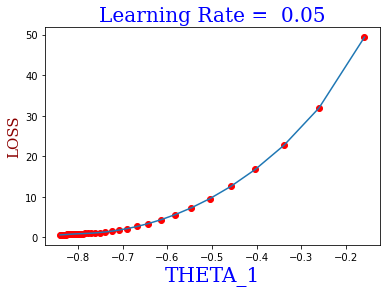

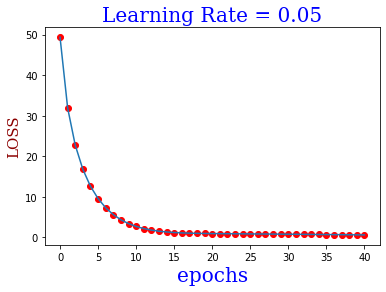

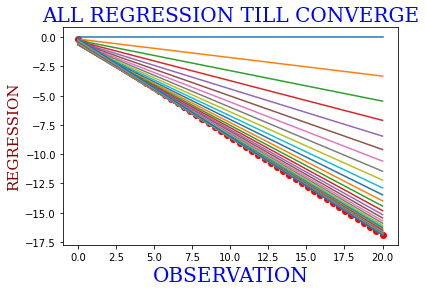

In [ ]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.05")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.05")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.05")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

In [5]:
def GD_WITH_ADAM(Input, Target, Learning_rate, beta_1, beta_2 ,iteration):
    # iterate 500 times to get minimum loss fun 
    theta_0 =0
    theta_1 =0
    v_t0=0 # for momentum ||theta_0
    v_t1=0 # for momentum ||theta_1
    m_t0 = 0
    m_t1 = 0
    lr=Learning_rate
    X = Input
    y = Target
    m = len(X)
    epsilon = 1e-08
    cost_lst = []
    theta0_all=[]
    theta1_all=[]
    h_x_all=[]
    itert=0
    #theta_0_new = theta_0
    #theta_1_new = theta_1
    for i in range (iteration):
        # general function of the model of LR
        h_x = theta_0 + X*theta_1
        # error = predicted -actual
        error = h_x - y
        # calculate cost function usin mean square error using dot product(make the summition of erroe**2)
        MSA = error @ error / (2 * m)
        cost_lst.append(MSA)
        # THETA_NEW = THETA_OLD - LEARNING_RATE * DERIVATIVE COST_FUN W.R.T OLD THETA 
        d_theta_0 = (sum(error)/m) # dj/d theta_0 = segma(error) /m 
        d_theta_1 = (error@X) /m   #dj/d theta_1 = segma(error)*X /m
        # update the weights
        # use momentum || for theta_0
        m_t0 = beta_1*m_t0 + (1-beta_1)*d_theta_0      #momentum   //adaptive moment
        v_t0 = beta_2*v_t0 + (1-beta_2)*(d_theta_0)**2 #rpms   // adaptive learning rate 
        theta_0 = theta_0 - (lr*m_t0)/(v_t0**0.5 +epsilon)
        # use momentum || for theta_1
        m_t1 = beta_1*m_t1 + (1-beta_1)*d_theta_1
        v_t1 = beta_2*v_t1 + (1-beta_2)*(d_theta_1)**2
        theta_1 = theta_1 - (lr*m_t1)/(v_t1**0.5 +epsilon)
        # append in theta0 and theta1 lists 
        theta0_all.append(theta_0)
        theta1_all.append(theta_1)
        h_x_all.append(h_x)
        # get norm of gradient to check if it close to zero stop iteration 
        # why norm beacuse here we have 2 componantes theta_0 and theta _1
        gradient_vector = np.array([d_theta_0,d_theta_1])
        gradient_vector_norm = LA.norm(gradient_vector,1)
        if i<10 or i>(iteration-10):
            print("\n###########iteration==",i,"#######################")
            #print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)
        if (int(gradient_vector_norm) == 0)and (cost_lst[i] -cost_lst[i-1]<=0.01) :
            print ("#############the gradient is close to zero############")
            print("iteration == ", i )
            itert=i
            #print("j==", MSA)
            print("gradient_vector", gradient_vector)
            print("gradient_vector_norm",gradient_vector_norm)

            break


    return(theta0_all, theta1_all, h_x_all,cost_lst, theta_0, theta_1)
    
    

##### The following results uses alpha = 0.05, beta1 = 0.2, beta2 = 0.7, epsilon =  1e-08, and max. iterations = 500.

In [6]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.05,0.2,0.7,500)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.19667358 104.1269308 ]
gradient_vector_norm 111.32360438118371

###########iteration== 2 #######################
gradient_vector [ 6.47597391 94.64632483]
gradient_vector_norm 101.12229873795103

###########iteration== 3 #######################
gradient_vector [ 5.84029241 86.2834362 ]
gradient_vector_norm 92.1237286053394

###########iteration== 4 #######################
gradient_vector [ 5.26335455 78.69266297]
gradient_vector_norm 83.95601751697161

###########iteration== 5 #######################
gradient_vector [ 4.72655563 71.62927319]
gradient_vector_norm 76.3558288173308

###########iteration== 6 #######################
gradient_vector [ 4.21872959 64.94634048]
gradient_vector_norm 69.16507007135311

###########iteration== 7 #######################
gradient_vector [ 3.73338612

In [7]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.95894126288719

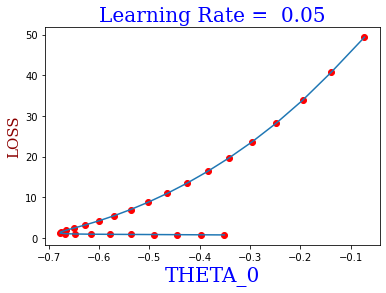

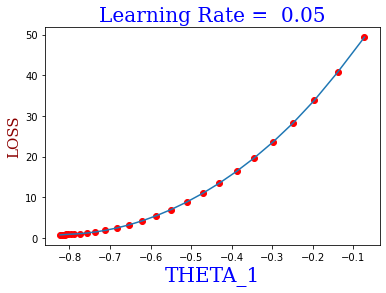

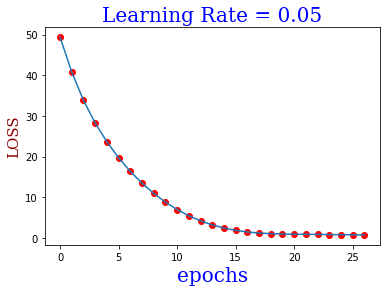

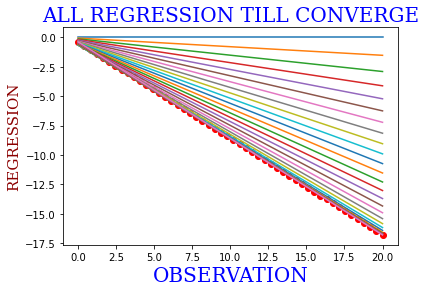

In [8]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.05")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.05")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.05")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

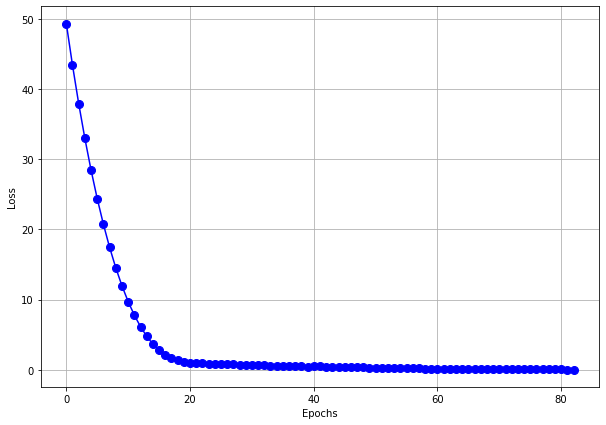

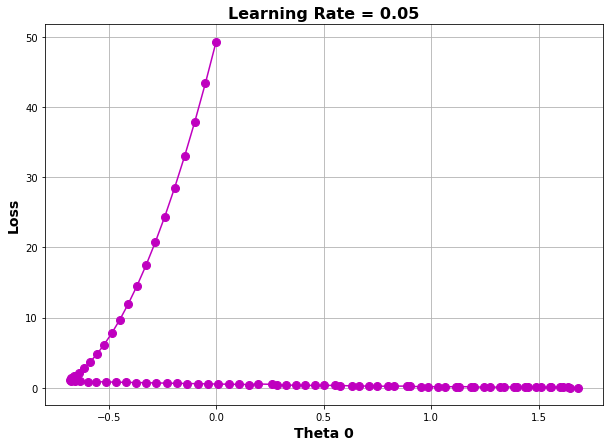

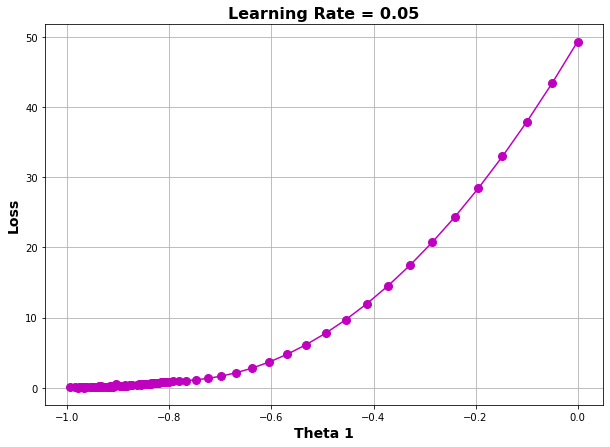

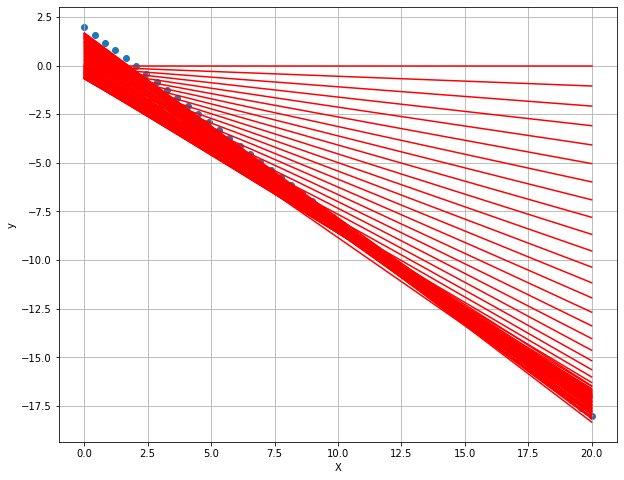

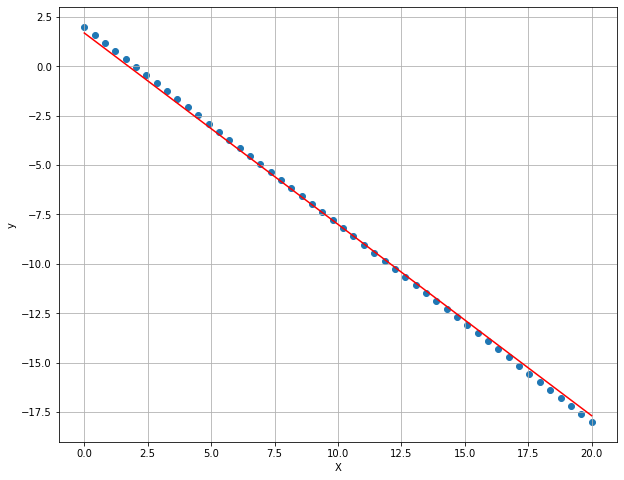

##### The following results uses alpha = 0.005, beta1 = 0.5, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 500.

In [10]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.005,0.5,0.8,500)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.93850813 113.88501419]
gradient_vector_norm 121.82352231663845

###########iteration== 2 #######################
gradient_vector [  7.86981309 112.98139898]
gradient_vector_norm 120.85121207004646

###########iteration== 3 #######################
gradient_vector [  7.80107184 112.07717343]
gradient_vector_norm 119.87824527134312

###########iteration== 4 #######################
gradient_vector [  7.73422801 111.19790352]
gradient_vector_norm 118.93213152492007

###########iteration== 5 #######################
gradient_vector [  7.66962379 110.34809043]
gradient_vector_norm 118.01771422177141

###########iteration== 6 #######################
gradient_vector [  7.60707977 109.52537419]
gradient_vector_norm 117.13245395794202

###########iteration== 7 #######################
gradient_vec

In [11]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9501832124854558

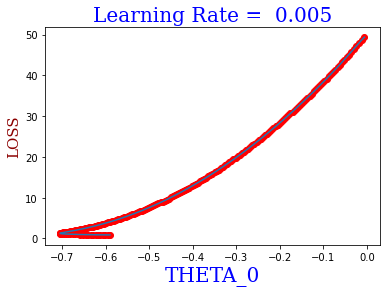

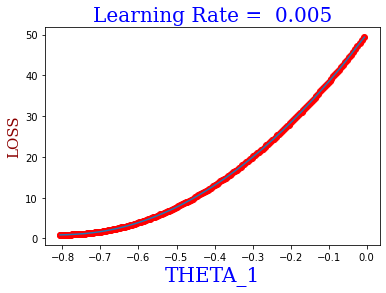

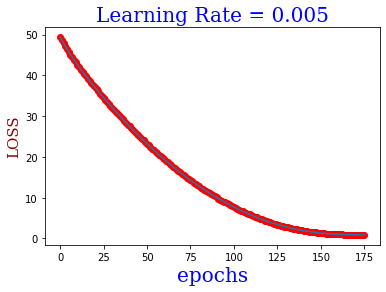

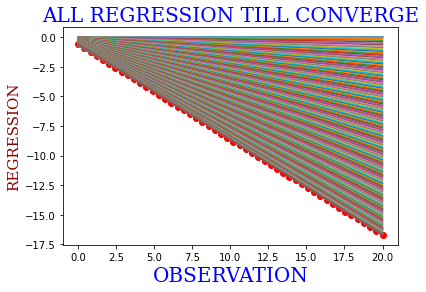

In [12]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.005")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.005")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

##### The following results uses alpha = 0.0005, beta1 = 0.8, beta2 = 0.8, epsilon =  1e-08, and max. iterations = 5000.

In [13]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.0005,0.8,0.8,5000)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.99754033 114.66152302]
gradient_vector_norm 122.65906334164514

###########iteration== 2 #######################
gradient_vector [  7.99424033 114.61811485]
gradient_vector_norm 122.61235517885812

###########iteration== 3 #######################
gradient_vector [  7.99039819 114.56757546]
gradient_vector_norm 122.55797364736537

###########iteration== 4 #######################
gradient_vector [  7.98617213 114.51198589]
gradient_vector_norm 122.49815801808688

###########iteration== 5 #######################
gradient_vector [  7.9816624  114.45266494]
gradient_vector_norm 122.43432733610985

###########iteration== 6 #######################
gradient_vector [  7.97693798 114.39051999]
gradient_vector_norm 122.36745796606591

###########iteration== 7 #######################
gradient_vec

In [14]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9475363517924987

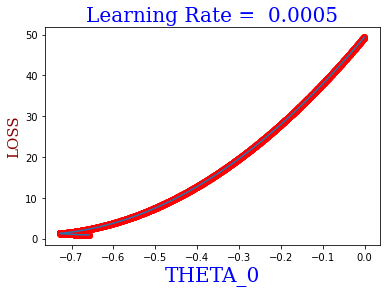

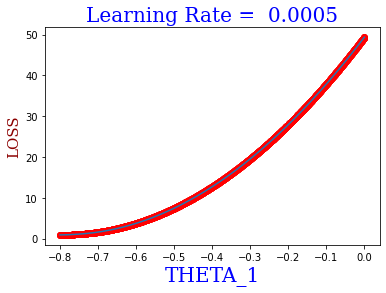

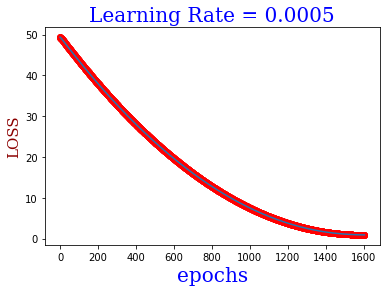

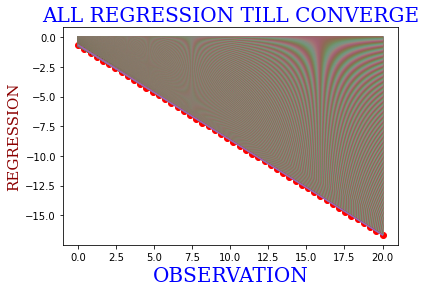

In [16]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.0005")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.0005")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.0005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

### Play with the parameters and see the results

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [17]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.001,0.9,0.99,5000)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.989      114.54918367]
gradient_vector_norm 122.53818367373303

###########iteration== 2 #######################
gradient_vector [  7.97418483 114.35430514]
gradient_vector_norm 122.3284899768063

###########iteration== 3 #######################
gradient_vector [  7.95688927 114.12679939]
gradient_vector_norm 122.08368865346425

###########iteration== 4 #######################
gradient_vector [  7.93783609 113.876174  ]
gradient_vector_norm 121.81401009225448

###########iteration== 5 #######################
gradient_vector [  7.91749552 113.60861419]
gradient_vector_norm 121.5261097043469

###########iteration== 6 #######################
gradient_vector [  7.89620094 113.32850524]
gradient_vector_norm 121.22470617629703

###########iteration== 7 #######################
gradient_vecto

In [18]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.956114222670931

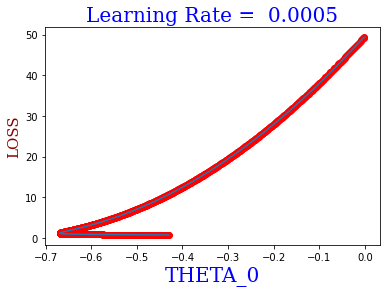

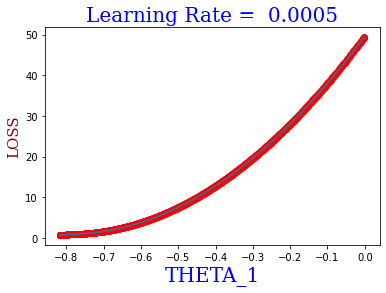

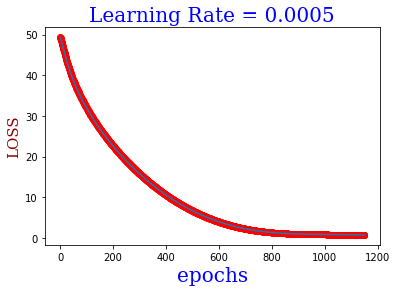

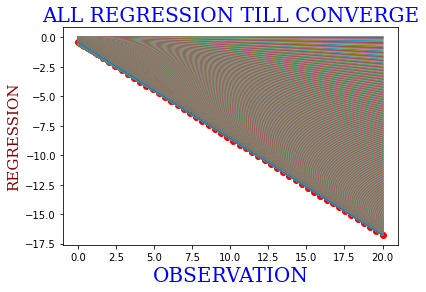

In [19]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.0005")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.0005")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.0005")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()  

##### The following results uses alpha = 0.001, beta1 = 0.9, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [20]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.001,0.8,0.5,5000)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.99688873 114.65295194]
gradient_vector_norm 122.64984067238875

###########iteration== 2 #######################
gradient_vector [  7.99231593 114.59280143]
gradient_vector_norm 122.58511736089213

###########iteration== 3 #######################
gradient_vector [  7.98657656 114.51730583]
gradient_vector_norm 122.50388239530922

###########iteration== 4 #######################
gradient_vector [  7.97986738 114.42905331]
gradient_vector_norm 122.40892068351604

###########iteration== 5 #######################
gradient_vector [  7.9723501  114.33017129]
gradient_vector_norm 122.30252139170189

###########iteration== 6 #######################
gradient_vector [  7.96416398 114.22249129]
gradient_vector_norm 122.1866552774353

###########iteration== 7 #######################
gradient_vect

In [21]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)


0.9462611128205256

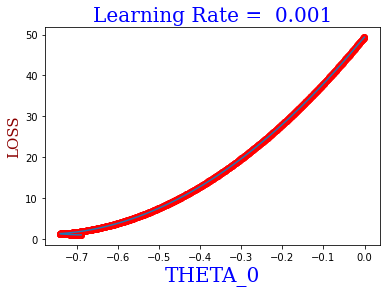

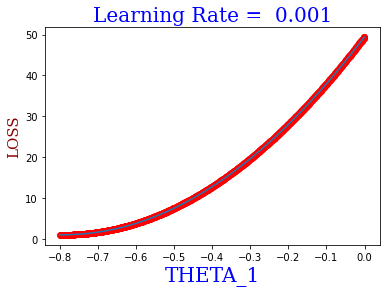

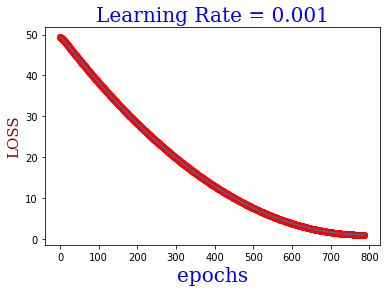

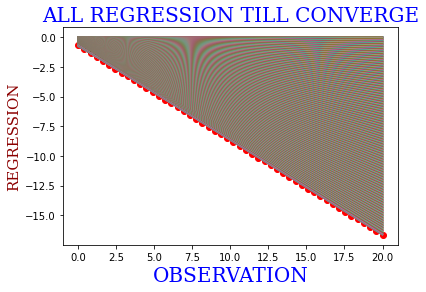

In [22]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","Learning Rate =  0.001")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","Learning Rate =  0.001")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","Learning Rate = 0.001")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [23]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.001,0.5,0.99,5000)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.945      113.97040816]
gradient_vector_norm 121.9154081645836

###########iteration== 2 #######################
gradient_vector [  7.88657885 113.20193536]
gradient_vector_norm 121.08851420232051

###########iteration== 3 #######################
gradient_vector [  7.83088672 112.46935772]
gradient_vector_norm 120.3002444363966

###########iteration== 4 #######################
gradient_vector [  7.77919605 111.78941244]
gradient_vector_norm 119.56860849472159

###########iteration== 5 #######################
gradient_vector [  7.73141823 111.16093421]
gradient_vector_norm 118.89235243863614

###########iteration== 6 #######################
gradient_vector [  7.68709898 110.57794768]
gradient_vector_norm 118.26504665412004

###########iteration== 7 #######################
gradient_vecto

In [24]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9570693878768267

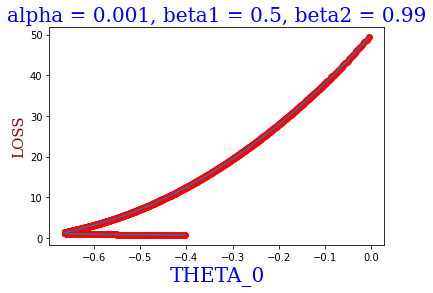

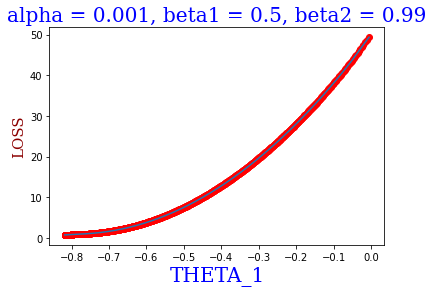

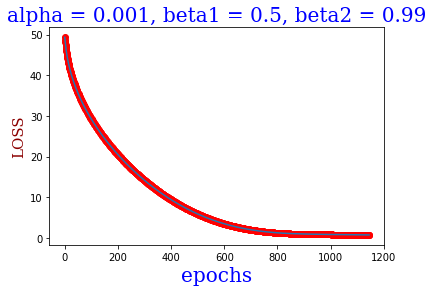

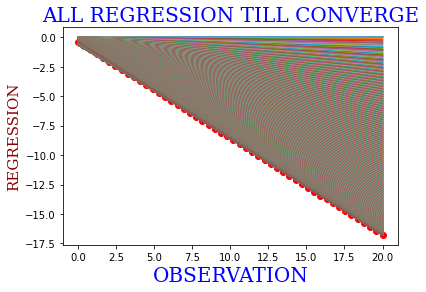

In [25]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","alpha = 0.001, beta1 = 0.5, beta2 = 0.99")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","alpha = 0.001, beta1 = 0.5, beta2 = 0.99")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","alpha = 0.001, beta1 = 0.5, beta2 = 0.99")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()

##### The following results uses alpha = 0.001, beta1 = 0.5, beta2 = 0.5, epsilon =  1e-08, and max. iterations = 5000.

In [26]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.0005,0.8,0.8,5000)


###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.99754033 114.66152302]
gradient_vector_norm 122.65906334164514

###########iteration== 2 #######################
gradient_vector [  7.99424033 114.61811485]
gradient_vector_norm 122.61235517885812

###########iteration== 3 #######################
gradient_vector [  7.99039819 114.56757546]
gradient_vector_norm 122.55797364736537

###########iteration== 4 #######################
gradient_vector [  7.98617213 114.51198589]
gradient_vector_norm 122.49815801808688

###########iteration== 5 #######################
gradient_vector [  7.9816624  114.45266494]
gradient_vector_norm 122.43432733610985

###########iteration== 6 #######################
gradient_vector [  7.97693798 114.39051999]
gradient_vector_norm 122.36745796606591

###########iteration== 7 #######################
gradient_vec

In [27]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9475363517924987

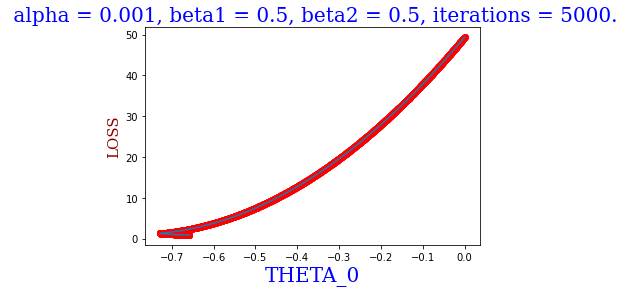

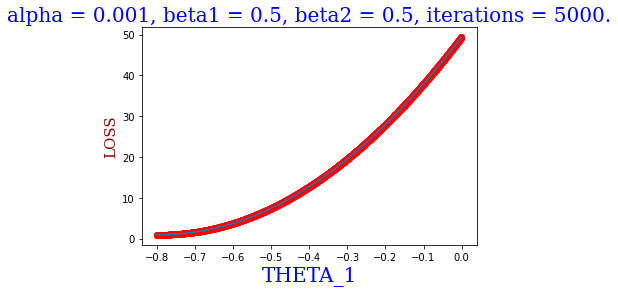

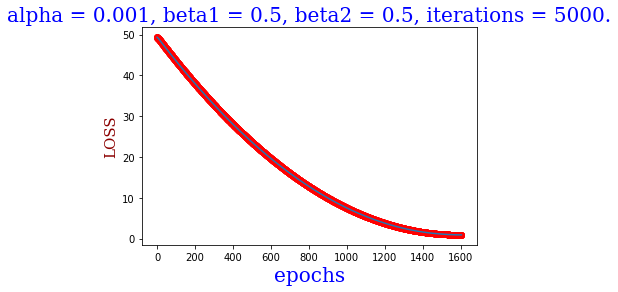

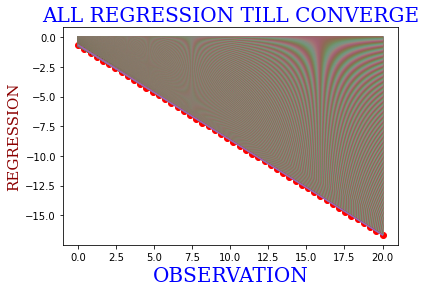

In [28]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS"," alpha = 0.001, beta1 = 0.5, beta2 = 0.5, iterations = 5000.")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","alpha = 0.001, beta1 = 0.5, beta2 = 0.5, iterations = 5000.")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","alpha = 0.001, beta1 = 0.5, beta2 = 0.5, iterations = 5000.")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()   

##### The following results uses alpha = 0.01, beta1 = 0.9, beta2 = 0.99, epsilon =  1e-08, and max. iterations = 5000.

In [30]:
theta0_all, theta1_all, h_x_all, cost_lst, theta_0, theta_1=GD_WITH_ADAM(X, y, 0.01,0.9,0.9,5000)



###########iteration== 0 #######################
gradient_vector [  8.         114.69387755]
gradient_vector_norm 122.69387755102042

###########iteration== 1 #######################
gradient_vector [  7.96521495 114.23631533]
gradient_vector_norm 122.20153028047952

###########iteration== 2 #######################
gradient_vector [  7.91726715 113.60561062]
gradient_vector_norm 121.52287777243039

###########iteration== 3 #######################
gradient_vector [  7.86000418 112.85237401]
gradient_vector_norm 120.71237818228123

###########iteration== 4 #######################
gradient_vector [  7.79549812 112.00386195]
gradient_vector_norm 119.79936007087119

###########iteration== 5 #######################
gradient_vector [  7.72510847 111.07795716]
gradient_vector_norm 118.80306563180177

###########iteration== 6 #######################
gradient_vector [  7.64981676 110.08757055]
gradient_vector_norm 117.73738730805741

###########iteration== 7 #######################
gradient_vec

In [31]:
h_x =theta_0 + theta_1 *X
#print("h(x) = y_predict: \n",h_x)
#print("y_actual: \n",y)
y_pred_GD = h_x
r2_score(y,y_pred_GD)

0.9499285643638445

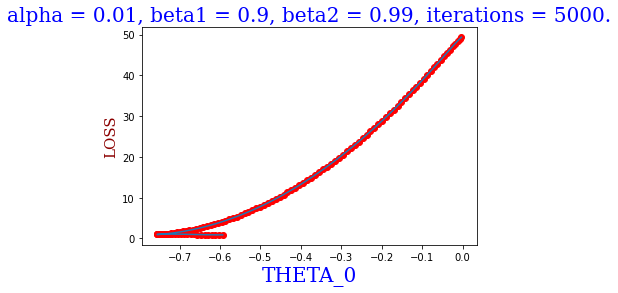

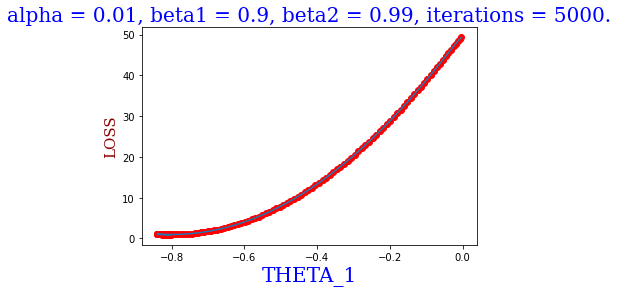

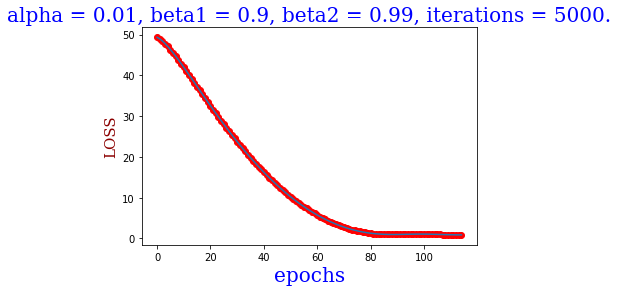

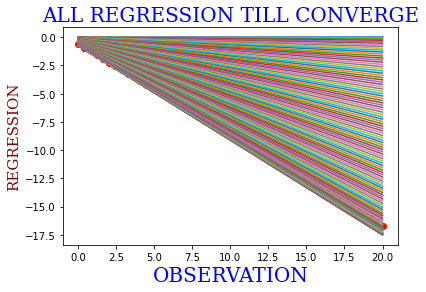

In [32]:
#for theta_0
plotting(theta0_all,cost_lst,"THETA_0","LOSS","alpha = 0.01, beta1 = 0.9, beta2 = 0.99, iterations = 5000.")
#for theta_1
plotting(theta1_all,cost_lst,"THETA_1","LOSS","alpha = 0.01, beta1 = 0.9, beta2 = 0.99, iterations = 5000.")
#for epochs
epochs=np.arange(0,len(h_x_all))
plotting(epochs,cost_lst,"epochs","LOSS","alpha = 0.01, beta1 = 0.9, beta2 = 0.99, iterations = 5000.")
#for regression 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}
plt.title("ALL REGRESSION TILL CONVERGE", fontdict = font1)
plt.xlabel("OBSERVATION", font1)
plt.ylabel("REGRESSION", font2)
for i in range(len(h_x_all)):
    plt.plot(X,h_x_all[i])
plt.scatter(X,h_x_all[-1],c="r")
plt.show()

## Congratulations 
![image.png](attachment:image.png)